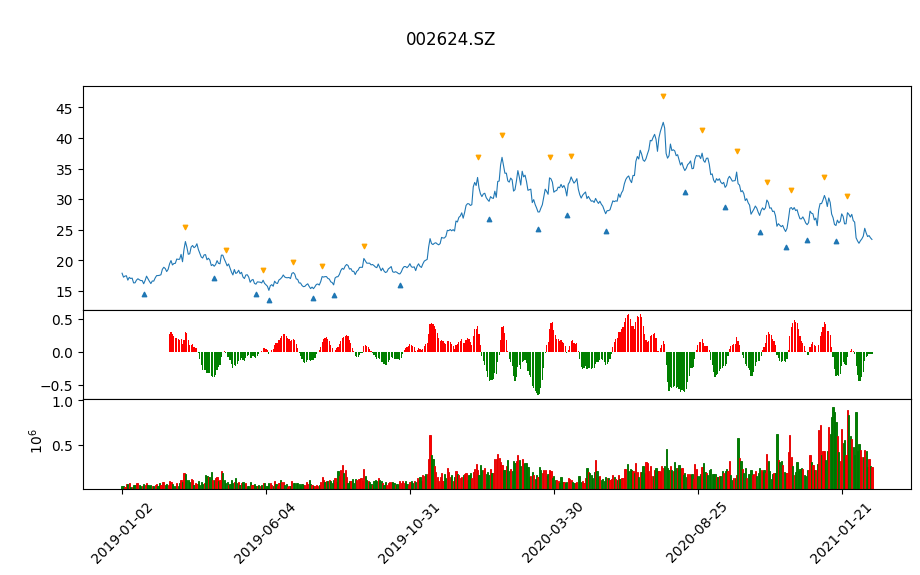

In [69]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
from xlib.astock import AStock
import talib as ta
import numpy as np 
import pandas as pd
import mplfinance as mpf
ts_code='002624.sz'
data=AStock.getStockDailyPriceByCode(ts_code,'tushare')
data=data[data['trade_date']>'20190101']
data=data[data['trade_date']<'20210301']
data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data=data.set_index('trade_date')   



data["macd"], data["macd_signal"], data["macd_hist"] = ta.MACD(data['close'])
colors = ['r' if v >= 0 else 'g' for v in data["macd_hist"]]
macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors) 

data['macd_hist_1']= data['macd_hist'].shift(1)
data['gold']=data.apply(lambda x: 1 if x['macd_hist_1']<=0 and x['macd_hist']>0   else 0, axis = 1)
data['death']=data.apply(lambda x: 1 if x['macd_hist_1']>=0 and x['macd_hist']<0   else 0, axis = 1)

data['high_signal']=np.nan
data['low_signal']=np.nan


max_value=0
min_value=9999
max_idx=0
min_idx=0


last_max=0
last_min=9999

data.sort_index()

for index, row in data.iterrows():
    
    if row['close']>max_value:
        max_value=row['close']
        max_idx=index

    elif row['close']<min_value:
        min_value=row['close']
        min_idx=index
    
    elif row['gold']==1 or row['death']==1:
        data.at[max_idx,'high_signal']=max_value*1.1
        data.at[min_idx,'low_signal']=min_value*0.9
        max_value=0
        min_value=9999      

        
#清理连续重复的点，在一个循环里也可以搞定，单开一个循环逻辑更清晰
flag="none"
high_value=0
high_index=0
low_value=9999
low_index=0
for index, row in data.iterrows():
    if  row['high_signal']>0 and row['low_signal']>0:
        data.at[index,'high_signal']=np.nan
        data.at[index,'low_signal']=np.nan
    
    if row['high_signal']>0 or row['low_signal']>0:
        if(flag=="none"):
            if not pd.isna(row['high_signal']):
                flag="high"
                high_value=row['close']
                high_index=index
            else:
                flag="low"
                low_value=row['close']
                low_index=index
        elif(flag=="high"):
            #如果上一个标记是high，且这个标记还是high
            if row['high_signal']>0:
                #如果现在的收盘价比上一个高点还高，那么清除掉上一个标记
                if(row['close']>high_value):
                    data.at[high_index,'high_signal']=np.nan
                    high_value=row['high_signal']
                    high_index=index
                else:
                    data.at[index,'high_signal']=np.nan
            else:
                flag="low"
                low_value=row['low_signal'] 
                low_index=index
        
        
        elif(flag=="low"):
            #如果上一个标记是low，且这个标记还是low
            if not pd.isna(row['low_signal']):
                #如果现在的收盘价比上一个低点还低，那么清除掉上一个标记
                if(row['close']<low_value):
                    data.at[low_index,'low_signal']=np.nan
                    low_value=row['low_signal']
                    low_index=index
                    
                else:
                    data.at[index,'low_signal']=np.nan
            else:
                flag="high"
                high_value=row['high_signal'] 
                high_index=index        

        else:
            pass

        
mycolor = mpf.make_marketcolors(up='red',down='green',inherit=True)
mystyle = mpf.make_mpf_style(y_on_right=False,marketcolors=mycolor)

high_signal_plot=mpf.make_addplot(data['high_signal'],type='scatter',markersize=10,marker='v',color='orange')
low_signal_plot=mpf.make_addplot(data['low_signal'],type='scatter',markersize=10,marker='^')


plots = [macd_hist_plot,high_signal_plot,low_signal_plot]

mpf.plot(data, 
         type='line',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         style=mystyle, 
         addplot=plots, 
         title=f"\n002624.SZ", 
         volume=True, 
         volume_panel=2,
         #vlines=dict(vlines=vlines,linewidths=0.5),
         ylabel='', 
         ylabel_lower=''
        )

今日收盘价：19.151002227171492
trade_date
2019-01-23     low
2019-03-12    high
2019-04-10     low
2019-04-22    high
2019-05-24     low
2019-05-31    high
2019-06-06     low
2019-07-02    high
2019-07-22     low
2019-07-30    high
2019-08-09     low
Name: signal, dtype: object
前1个标记点是low，价格为：15.980044543429845，时间为：2019-08-09 00:00:00
前2个标记点是high，价格为：17.338084632516704，时间为：2019-07-30 00:00:00
前3个标记点是low，价格为：15.360356347438755，时间为：2019-07-22 00:00:00
前4个标记点是high，价格为：17.990734966592427，时间为：2019-07-02 00:00:00
前5个标记点是low，价格为：15.085539293668472，时间为：2019-06-06 00:00:00
前6个标记点是high，价格为：16.741349029589564，时间为：2019-05-31 00:00:00

----上升趋势中---


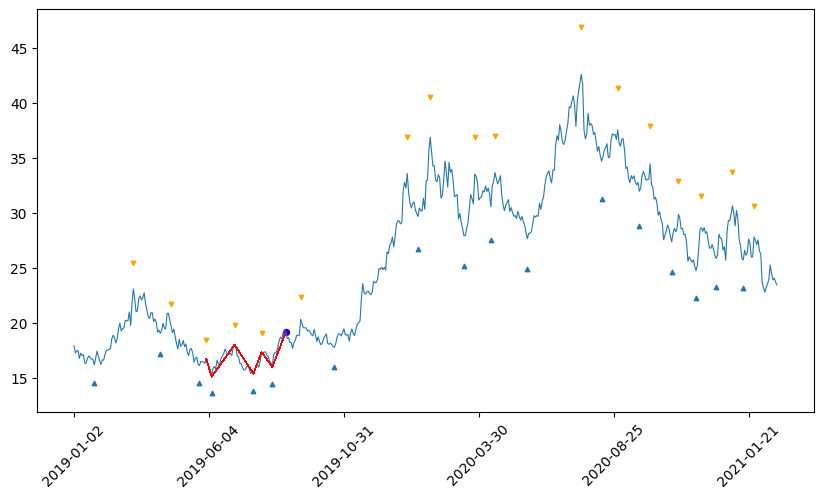

今日收盘价：36.51899459115495
trade_date
2019-01-23     low
2019-03-12    high
2019-04-10     low
2019-04-22    high
2019-05-24     low
2019-05-31    high
2019-06-06     low
2019-07-02    high
2019-07-22     low
2019-07-30    high
2019-08-09     low
2019-09-09    high
2019-10-22     low
2020-01-07    high
2020-01-17     low
2020-02-07    high
2020-03-13     low
2020-03-25    high
2020-04-13     low
2020-04-16    high
2020-05-25     low
2020-07-22    high
2020-08-12     low
Name: signal, dtype: object
前1个标记点是low，价格为：34.683121221762654，时间为：2020-08-12 00:00:00
前2个标记点是high，价格为：42.57241489023227，时间为：2020-07-22 00:00:00
前3个标记点是low，价格为：27.62227171492205，时间为：2020-05-25 00:00:00
前4个标记点是high，价格为：33.64115812917595，时间为：2020-04-16 00:00:00
前5个标记点是low，价格为：30.52953229398664，时间为：2020-04-13 00:00:00
前6个标记点是high，价格为：33.489532293986635，时间为：2020-03-25 00:00:00

----震荡趋势中---
看不出来啥


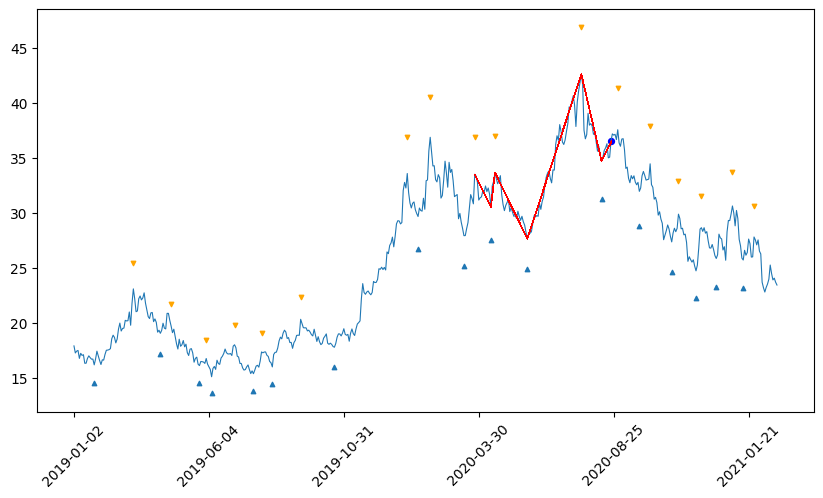

今日收盘价：26.654896595609294
trade_date
2019-01-23     low
2019-03-12    high
2019-04-10     low
2019-04-22    high
2019-05-24     low
2019-05-31    high
2019-06-06     low
2019-07-02    high
2019-07-22     low
2019-07-30    high
2019-08-09     low
2019-09-09    high
2019-10-22     low
2020-01-07    high
2020-01-17     low
2020-02-07    high
2020-03-13     low
2020-03-25    high
2020-04-13     low
2020-04-16    high
2020-05-25     low
2020-07-22    high
2020-08-12     low
2020-08-28    high
2020-09-21     low
2020-10-09    high
2020-11-02     low
2020-11-09    high
2020-11-26     low
2020-12-02    high
Name: signal, dtype: object
前1个标记点是high，价格为：28.629700922685338，时间为：2020-12-02 00:00:00
前2个标记点是low，价格为：24.70986318803691，时间为：2020-11-26 00:00:00
前3个标记点是high，价格为：29.860232262169905，时间为：2020-11-09 00:00:00
前4个标记点是low，价格为：27.33962774419345，时间为：2020-11-02 00:00:00
前5个标记点是high，价格为：34.435030225898835，时间为：2020-10-09 00:00:00
前6个标记点是low，价格为：31.934272987591477，时间为：2020-09-21 00:00:00

----下降趋势中---


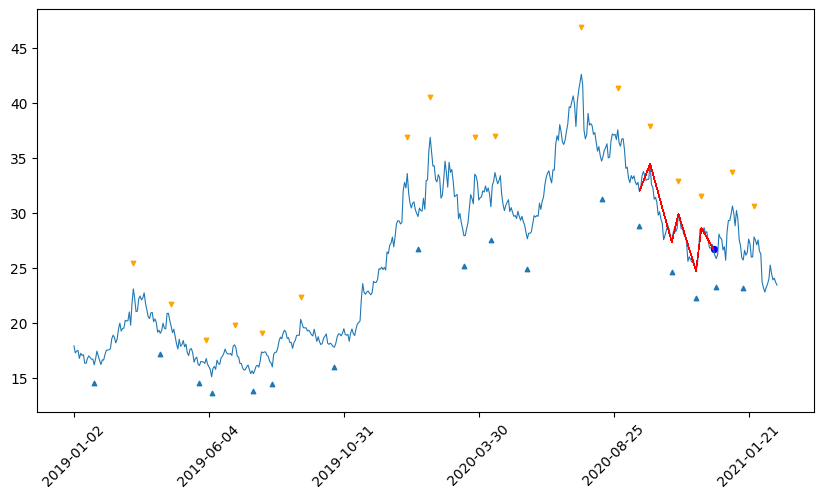

In [128]:
def location(df,date,draw=True):
    date = pd.to_datetime(date, format='%Y%m%d')
    df2=df.loc[:date]
    df2=df2.dropna(subset=['close'])
    now=df2.iloc[-1]
    signal=df2.copy()[(df2.high_signal>0)|(df2.low_signal>0)]
    signal['signal']=signal.apply(lambda x:'high' if x['high_signal']>0 else 'low',axis=1)
    alines=[]
    now_close=now['close']
    print("今日收盘价："+str(now_close))
    print(signal['signal'])
    
  
    
    #画线
    alines.append((date,now_close))
    hlines=[]
    for i in range(1,7):
        print("前"+str(i)+"个标记点是"+signal.iloc[-i]['signal']
              +"，价格为："+str(signal.iloc[-i]['close'])
              +"，时间为："+str(signal.iloc[-i].name))
        alines.append((signal.iloc[-i].name,signal.iloc[-i]['close']))
 
    
    
    if(signal.iloc[-1]['signal']=='low'):
        low3=signal.iloc[-1]['close']
        low2=signal.iloc[-3]['close']
        low1=signal.iloc[-5]['close']
        high3=signal.iloc[-2]['close']
        high2=signal.iloc[-4]['close']
        high1=signal.iloc[-6]['close']
    else:
        low3=signal.iloc[-2]['close']
        low2=signal.iloc[-4]['close']
        low1=signal.iloc[-6]['close']    
        high3=signal.iloc[-1]['close']
        high2=signal.iloc[-3]['close']
        high1=signal.iloc[-5]['close']

    if(low3>low2 and low2>low1):
        print("\n----上升趋势中---")
        
    elif(low3<low2 and low2<low1):
        print("\n----下降趋势中---")

    else:
        print("\n----震荡趋势中---")
        print("看不出来啥")
    
    
    data['mark']=np.nan
    data.at[df2.iloc[-1].name,'mark']=now_close
    
    mark_plot = mpf.make_addplot(data['mark'],type='scatter',color='b')

    plots = [high_signal_plot,low_signal_plot,mark_plot]
    
    mpf.plot(data, 
             type='line',
             datetime_format='%Y-%m-%d',
             figratio=(15,8), 
             style=mystyle, 
             addplot=plots, 
             volume=False,
             alines=dict(alines=alines,colors=['r'],linewidths=0.5),
             ylabel='', 
            #hlines=hlines,
             ylabel_lower=''
            )    


location(data,'20190823')

location(data,'20200823')
 
location(data,'20201215')

前1个标记点是low，价格为：15.980044543429845，时间为：2019-08-09 00:00:00
前2个标记点是high，价格为：17.338084632516704，时间为：2019-07-30 00:00:00
前3个标记点是low，价格为：15.360356347438755，时间为：2019-07-22 00:00:00
前4个标记点是high，价格为：17.990734966592427，时间为：2019-07-02 00:00:00
前5个标记点是low，价格为：15.085539293668472，时间为：2019-06-06 00:00:00
前6个标记点是high，价格为：16.741349029589564，时间为：2019-05-31 00:00:00

----上升趋势中---
123法则
当前价格在趋势线之上，大概率维持上升趋势，+1分
当前价格逐步保持新高状态，大概率维持上升趋势，+1分
当前价格在前期低点之上，大概率维持上升趋势，+1分
2B法则
当前未发生穿越前高或跌破前高现象，大概率维持上升趋势，+1分


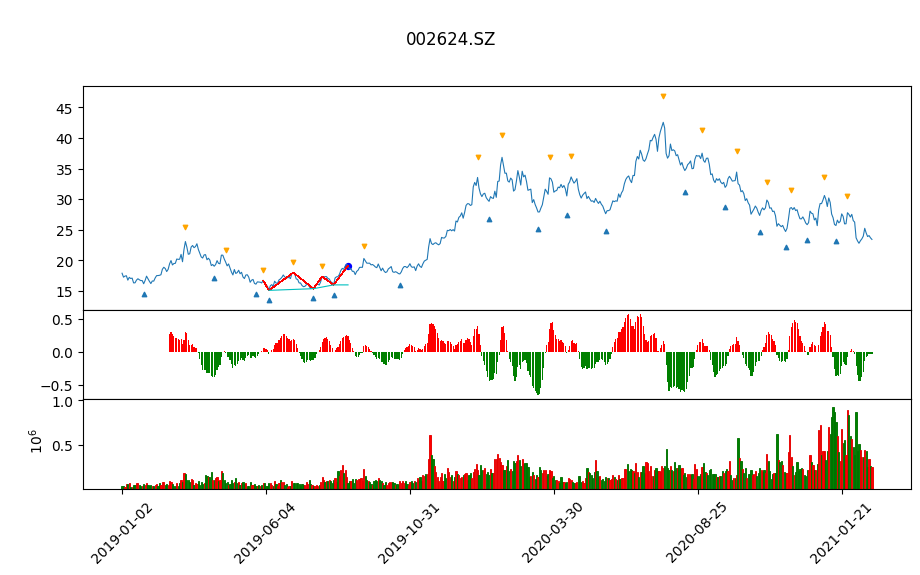

前1个标记点是low，价格为：34.683121221762654，时间为：2020-08-12 00:00:00
前2个标记点是high，价格为：42.57241489023227，时间为：2020-07-22 00:00:00
前3个标记点是low，价格为：27.62227171492205，时间为：2020-05-25 00:00:00
前4个标记点是high，价格为：33.64115812917595，时间为：2020-04-16 00:00:00
前5个标记点是low，价格为：30.52953229398664，时间为：2020-04-13 00:00:00
前6个标记点是high，价格为：33.489532293986635，时间为：2020-03-25 00:00:00

----震荡趋势中---
看不出来啥


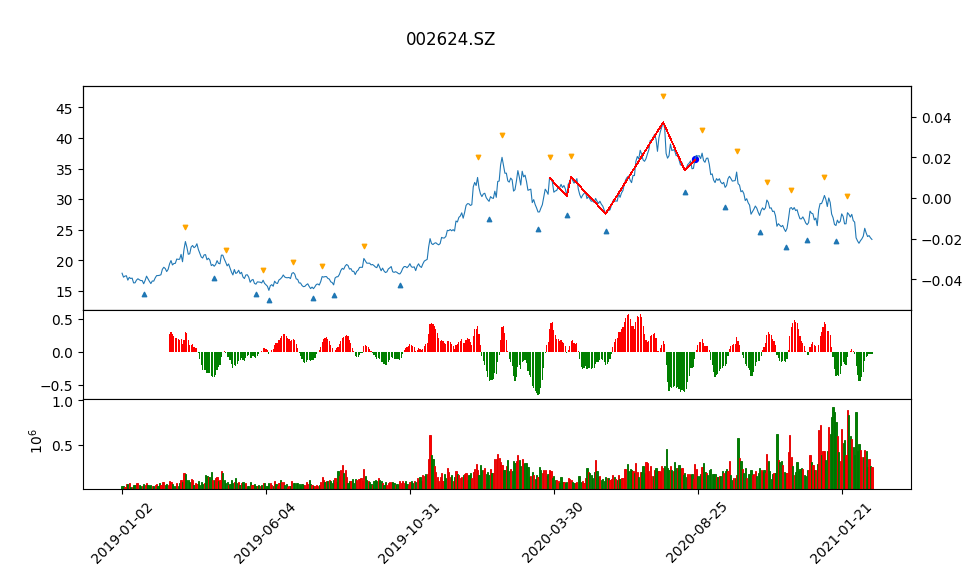

前1个标记点是high，价格为：28.629700922685338，时间为：2020-12-02 00:00:00
前2个标记点是low，价格为：24.70986318803691，时间为：2020-11-26 00:00:00
前3个标记点是high，价格为：29.860232262169905，时间为：2020-11-09 00:00:00
前4个标记点是low，价格为：27.33962774419345，时间为：2020-11-02 00:00:00
前5个标记点是high，价格为：34.435030225898835，时间为：2020-10-09 00:00:00
前6个标记点是low，价格为：31.934272987591477，时间为：2020-09-21 00:00:00

----下降趋势中---
123法则
当前价格在趋势线之下，维持下行趋势，-1分
当前暂未破新低，可持续观察，+1分
没破前高，-1分
2B法则
当前未发生新低后涨回前低现象，大概率维持下降趋势，-1分


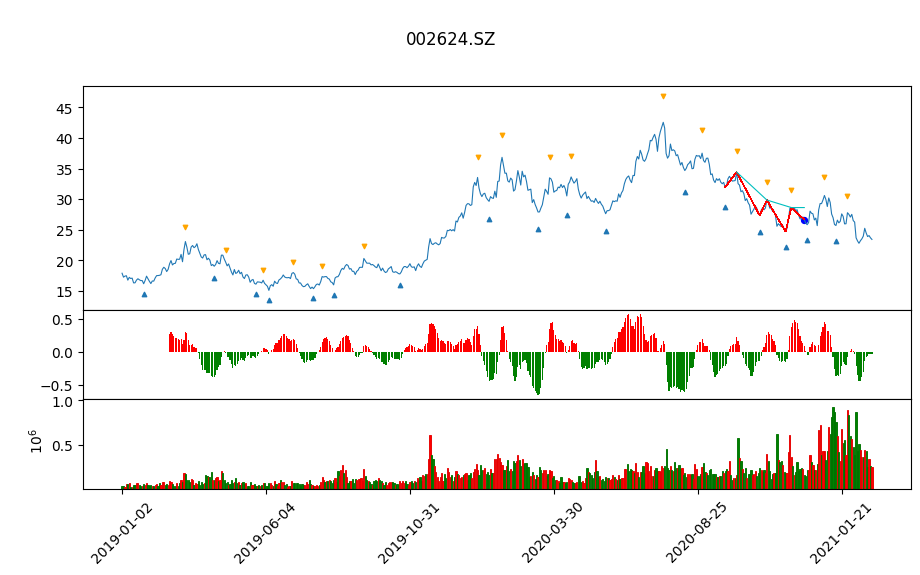

In [116]:
def location(df,date,draw=True):
    date = pd.to_datetime(date, format='%Y%m%d')
    data['linear_low']=np.nan
    data['linear_high']=np.nan
    
    df2=df.loc[:date]
    df2=df2.dropna(subset=['close'])
 
    now=df2.iloc[-1]
    signal=df2.copy()[(df2.high_signal>0)|(df2.low_signal>0)]
    signal['signal']=signal.apply(lambda x:'high' if x['high_signal']>0 else 'low',axis=1)
    alines=[]
    #print(signal)
    
    now_close=now['close']
    #print("今日收盘价："+str(now_close))
    
    #画线
    alines.append((date,now_close))
    hlines=[]
    for i in range(1,7):
        print("前"+str(i)+"个标记点是"+signal.iloc[-i]['signal']
              +"，价格为："+str(signal.iloc[-i]['close'])
              +"，时间为："+str(signal.iloc[-i].name))
        alines.append((signal.iloc[-i].name,signal.iloc[-i]['close']))
    
    
    if(signal.iloc[-1]['signal']=='low'):
        low3=signal.iloc[-1]['close']
        low2=signal.iloc[-3]['close']
        low1=signal.iloc[-5]['close']
        high3=signal.iloc[-2]['close']
        high2=signal.iloc[-4]['close']
        high1=signal.iloc[-6]['close']
    else:
        low3=signal.iloc[-2]['close']
        low2=signal.iloc[-4]['close']
        low1=signal.iloc[-6]['close']    
        high3=signal.iloc[-1]['close']
        high2=signal.iloc[-3]['close']
        high1=signal.iloc[-5]['close']
    
    
    if(signal.iloc[-1]['signal']=='low'):
        data.at[signal.iloc[-1].name,'linear_low']=signal.iloc[-1]['close']
        data.at[signal.iloc[-3].name,'linear_low']=signal.iloc[-3]['close']
        data.at[signal.iloc[-5].name,'linear_low']=signal.iloc[-5]['close']
        data.at[signal.iloc[-2].name,'linear_high']=signal.iloc[-2]['close']
        data.at[signal.iloc[-4].name,'linear_high']=signal.iloc[-4]['close']
        data.at[signal.iloc[-6].name,'linear_high']=signal.iloc[-6]['close']    
    else:
        data.at[signal.iloc[-2].name,'linear_low']=signal.iloc[-2]['close']
        data.at[signal.iloc[-4].name,'linear_low']=signal.iloc[-4]['close']
        data.at[signal.iloc[-6].name,'linear_low']=signal.iloc[-6]['close']
        data.at[signal.iloc[-1].name,'linear_high']=signal.iloc[-1]['close']
        data.at[signal.iloc[-3].name,'linear_high']=signal.iloc[-3]['close']
        data.at[signal.iloc[-5].name,'linear_high']=signal.iloc[-5]['close']  
        
        
    linear_high=data['linear_high'].loc[signal.iloc[-6].name:date]
    linear_high=linear_high.interpolate()    
    linear_low=data['linear_low'].loc[signal.iloc[-6].name:date]
    linear_low=linear_low.interpolate()

    if(low3>low2 and low2>low1):
        print("\n----上升趋势中---")
        print("123法则")
        hlines=dict(hlines=[low3],linestyle='-.',colors=['y'],linewidths=0.5)
        data['tend']=linear_low    
        
        #法则1，趋势线被突破，发生反转几率大
        #print("当前价格："+str(round(now_close,2))+"，趋势线点位："+str(round(linear_low[-1],2)))     
        if(now_close>linear_low[-1]):
            print("当前价格在趋势线之上，大概率维持上升趋势，+1分")
        else:
            print("当前价格在趋势线之下，趋势变弱，-1分")
        
        #法则2，上升趋势不再创新高
        if(high3>high2 or (now_close>high3) and now_close>high2):
            print("当前价格逐步保持新高状态，大概率维持上升趋势，+1分")
        else:
            print("当前价格趋势不再新高，上升趋势变弱，-1分")            
            
        #法则3，上升趋势不再创新高
        if(now_close>low3):
            print("当前价格在前期低点之上，大概率维持上升趋势，+1分")
        else:
            print("当前价格在前期低点之下，趋势变弱，-1分")   
            
        print("2B法则")
        if(high3>high2 and now_close<high3):
            print("穿越前高后发生跌破前高现象，趋势可能转变，-1分")   
        else:
            print("当前未发生穿越前高或跌破前高现象，大概率维持上升趋势，+1分") 
        
    elif(low3<low2 and low2<low1):
        print("\n----下降趋势中---")
        hlines=dict(hlines=[high3],linestyle='-.',colors=['y'],linewidths=0.5)
        data['tend']=linear_high      

        print("123法则")  
        
        #法则1，趋势线被突破，发生反转几率大
        #print("当前价格："+str(round(now_close,2))+"，趋势线点位："+str(round(linear_low[-1],2)))     
        if(now_close>linear_high[-1]):
            print("当前价格在趋势线之上，有概率发生反转，+1分")
        else:
            print("当前价格在趋势线之下，维持下行趋势，-1分")
        
        #法则2，下降趋势不再创新低
        if(now_close>low3):
            print("当前暂未破新低，可持续观察，+1分")
        else:
            print("又新低了，快逃！-1分")            
            
        #法则3，下降趋势中突破前高
        if(now_close>high3):
            print("破前高，+1分")
        else:
            print("没破前高，-1分")   
            
        print("2B法则")
        if(low3<low2 and now_close>low2):
            print("新低后涨回前低，可能会反转，+1分")           
        else:
            print("当前未发生新低后涨回前低现象，大概率维持下降趋势，-1分")         
        
        
        
    else:
        print("\n----震荡趋势中---")
        print("看不出来啥")
        data['tend']=np.nan
        data.at[data.iloc[0].name,'tend']=0
    
    
    
    data['mark']=np.nan
    data.at[df2.iloc[-1].name,'mark']=now_close


    
    tend_plot=mpf.make_addplot(data['tend'],color='c', panel=0,width=0.8)
    
    
    mark_plot = mpf.make_addplot(data['mark'],type='scatter',color='b')

    plots = [macd_hist_plot,high_signal_plot,low_signal_plot,mark_plot]
    
    mpf.plot(data, 
             type='line',
             datetime_format='%Y-%m-%d',
             figratio=(20,10), 
             style=mystyle, 
             addplot=plots, 
             title=f"\n002624.SZ", 
             volume=True, 
             volume_panel=2,
             alines=dict(alines=alines,colors=['r'],linewidths=0.5),
             ylabel='', 
            #hlines=hlines,
             ylabel_lower=''
            )    


location(data,'20190823')
location(data,'20200823')
location(data,'20201215')

In [24]:
data['tmp']=1
data['no']=data['tmp'].cumsum()


trade_date
2019-01-02      1
2019-01-03      2
2019-01-04      3
2019-01-07      4
2019-01-08      5
             ... 
2022-04-18    798
2022-04-19    799
2022-04-20    800
2022-04-21    801
2022-04-22    802
Name: no, Length: 802, dtype: int64